In [26]:
import os
import numpy as np
import pandas as pd              
import matplotlib.pyplot as plt 
import random

# Configure the notebook to display plots
%matplotlib inline

# Define the path to the data folder
data_dir = '/dli/task/data/hx_series'
csv_dir = '/dli/task/csv'

# Loading Data 

In [2]:
# training data inputs: x and targets: y
x_train_path = os.path.join(data_dir, 'X_train.hdf')
y_train_path = os.path.join(data_dir, 'y_train.hdf')

# validation data inputs: x and targest: y
x_valid_path = os.path.join(data_dir, 'X_test.hdf')
y_valid_path = os.path.join(data_dir, 'y_test.hdf')

In [3]:
# It should take less than one minute to load the files
X_train = pd.read_hdf(x_train_path)
y_train = pd.read_hdf(y_train_path)
X_valid = pd.read_hdf(x_valid_path)
y_valid = pd.read_hdf(y_valid_path)
print('data load complete')

data load complete


In [5]:
X_train.head(5)

ABG Base excess (mEq/L)  ABG FiO2  ABG HCO3 (mEq/L)  \
encounterID absoluteTime                                                        
8           0.000000                          NaN       NaN               NaN   
            0.250000                          NaN       NaN               NaN   
            0.500000                          NaN       NaN               NaN   
            0.583333                          NaN       NaN               NaN   
            0.750000                          NaN       NaN               NaN   

                          ABG O2 sat (%)  ABG PCO2 (mmHg)  ABG PO2 (mmHg)  \
encounterID absoluteTime                                                    
8           0.000000                 NaN              NaN             NaN   
            0.250000                 NaN              NaN             NaN   
            0.500000                 NaN              NaN             NaN   
            0.583333                 NaN              NaN             NaN   
            0.750000                 NaN              NaN             NaN   

                          ABG TCO2 (mEq/L)  ABG pH  ALT (SGPT) (units/L)  \
encounterID absoluteTime                                                   
8           0.000000                   NaN     NaN                   NaN   
            0.250000                   NaN     NaN                   NaN   
            0.500000                   NaN     NaN                   NaN   
            0.583333                   NaN     NaN                   NaN   
            0.750000                   NaN     NaN                   NaN   

                          AST (SGOT) (units/L)  ...  Vasopressin  Vecuronium  \
encounterID absoluteTime                        ...                            
8           0.000000                       NaN  ...          NaN         NaN   
            0.250000                       NaN  ...          NaN         NaN   
            0.500000                       NaN  ...          NaN         NaN   
            0.583333                       NaN  ...          NaN         NaN   
            0.750000                       NaN  ...          NaN         NaN   

                          Ventilator rate (bpm)  VerbalResponse  Vitamin E  \
encounterID absoluteTime                                                     
8           0.000000                        NaN             NaN        NaN   
            0.250000                        NaN             NaN        NaN   
            0.500000                        NaN             NaN        NaN   
            0.583333                        NaN             NaN        NaN   
            0.750000                        NaN             5.0        NaN   

                          Volume Tidal  Voriconazole  Weight  \
encounterID absoluteTime                                       
8           0.000000               NaN           NaN    25.0   
            0.250000               NaN           NaN     NaN   
            0.500000               NaN           NaN     NaN   
            0.583333               NaN           NaN     NaN   
            0.750000               NaN           NaN     NaN   

                          White blood cell count (K/uL)    deltat  
encounterID absoluteTime                                           
8           0.000000                                NaN  0.250000  
            0.250000                                NaN  0.250000  
            0.500000                                NaN  0.083333  
            0.583333                                NaN  0.166667  
            0.750000                                NaN  0.633333  

[5 rows x 265 columns]

In [6]:
y_train.head(5)

mortalityResponse
encounterID absoluteTime                   
8           0.000000                      1
            0.250000                      1
            0.500000                      1
            0.583333                      1
            0.750000                      1

# Data Exploration

In [8]:
# Select a random patient encounterID from a list of all the encounterID values
eIdx = random.choice(list(X_train.index.levels[0]))

# Specify a few variables to look at
variables = [
    'Age','Heart rate (bpm)','PulseOximetry','Weight',
    'SystolicBP','DiastolicBP','Respiratory rate (bpm)',
    'MotorResponse','Capillary refill rate (sec)'
]


# Have a look at the variables for the selected patient
print('encounterID = {}'.format(eIdx))
print('number of observations = {}'.format(X_train.loc[eIdx].index.shape[0]))
print('max absoluteTime value = {} hours'.format(X_train.loc[eIdx].index[-1]))
X_train.loc[eIdx, variables]

encounterID = 10143
number of observations = 548
max absoluteTime value = 247.63333129882812 hours


,Age,Heart rate (bpm),PulseOximetry,Weight,SystolicBP,DiastolicBP,Respiratory rate (bpm),MotorResponse,Capillary refill rate (sec)
absoluteTime,,,,,,,,,
0.000000,1.640093,168.0,100.0,11.97,81.0,47.0,47.0,6.0,3.0
0.216667,1.640117,168.0,100.0,NaN,82.0,40.0,30.0,NaN,NaN
0.466667,1.640146,169.0,100.0,NaN,85.0,32.0,32.0,NaN,NaN
0.716667,1.640174,170.0,100.0,NaN,92.0,14.0,50.0,NaN,NaN
0.966667,1.640203,169.0,99.0,NaN,80.0,65.0,25.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...
246.966660,1.668266,112.0,97.0,11.97,86.0,54.0,13.0,1.0,2.0
247.216660,1.668294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247.466660,1.668323,110.0,97.0,NaN,86.0,54.0,14.5,NaN,NaN


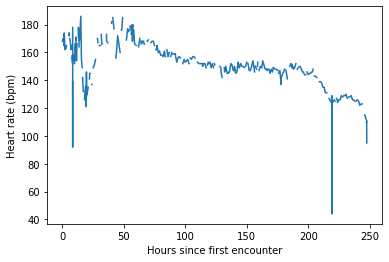

In [10]:
X_train.loc[eIdx, "Heart rate (bpm)"].plot()
plt.ylabel("Heart rate (bpm)")
plt.xlabel("Hours since first encounter")
plt.show()

In [14]:
eIdx_list = X_train.index.levels[0]
nobs_list = [X_train.loc[ix].index.shape[0] for ix in eIdx_list]
len(eIdx_list)

5000

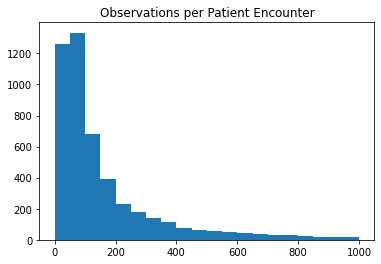

In [16]:
plt.hist(nobs_list,range=(0,1000), bins=20)
plt.title("Observations per Patient Encounter")
plt.show()

In [17]:
print('The mean = {}'.format(np.mean(nobs_list)))
print('The median = {}'.format(np.median(nobs_list)))

The mean = 222.7058
The median = 94.0


In [19]:
eIdx_list = X_train.index.levels[0]
timespan_list = [X_train.loc[ix].index[-1] for ix in eIdx_list] #FIXME
len(timespan_list)

5000

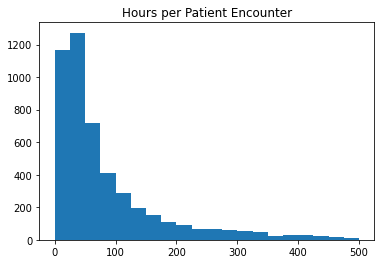

In [21]:
plt.hist(timespan_list,range=(0,500), bins=20)
plt.title("Hours per Patient Encounter")
plt.show()

In [22]:
print('The mean = {}'.format(np.mean(timespan_list)))
print('The median = {}'.format(np.median(timespan_list)))

The mean = 112.8358599603653
The median = 51.5


# Preprocessing

## Normalization

In [24]:
# Before normalization
X_train.loc[8,['Age','Heart rate (bpm)','PulseOximetry','Weight',
    'SystolicBP','DiastolicBP','Respiratory rate (bpm)',
    'MotorResponse','Capillary refill rate (sec)']]

,Age,Heart rate (bpm),PulseOximetry,Weight,SystolicBP,DiastolicBP,Respiratory rate (bpm),MotorResponse,Capillary refill rate (sec)
absoluteTime,,,,,,,,,
0.000000,7.573383,107.0,100.0,25.0,NaN,NaN,19.0,NaN,NaN
0.250000,7.573411,98.0,100.0,NaN,NaN,NaN,31.0,NaN,NaN
0.500000,7.573440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.583333,7.573450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.750000,7.573468,103.0,100.0,NaN,130.0,92.0,37.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...
150.500000,7.590551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150.750000,7.590580,94.0,100.0,25.0,121.0,88.0,14.0,6.0,2.0
150.766663,7.590582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
metadata = os.path.join(csv_dir, 'ehr_features.csv')
variables = pd.read_csv(metadata, index_col=0)

normvars = variables[variables['type'].isin(['Interventions', 'Labs', 'Vitals'])]

# finally, iterate over each variable in both training and validation data
for vId, dat in normvars.iterrows():
    X_train[vId] = X_train[vId] - dat['mean']
    X_valid[vId] = X_valid[vId] - dat['mean']
    X_train[vId] = X_train[vId] / (dat['std'] + 1e-12)
    X_valid[vId] = X_valid[vId] / (dat['std'] + 1e-12)
    

In [28]:
# After normalization
X_train.loc[8,['Age','Heart rate (bpm)','PulseOximetry','Weight',
    'SystolicBP','DiastolicBP','Respiratory rate (bpm)',
    'MotorResponse','Capillary refill rate (sec)']]

,Age,Heart rate (bpm),PulseOximetry,Weight,SystolicBP,DiastolicBP,Respiratory rate (bpm),MotorResponse,Capillary refill rate (sec)
absoluteTime,,,,,,,,,
0.000000,7.573383,-0.429630,0.805317,-10.577633,NaN,NaN,-0.928604,NaN,NaN
0.250000,7.573411,-0.986894,0.805317,NaN,NaN,NaN,1.122353,NaN,NaN
0.500000,7.573440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.583333,7.573450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.750000,7.573468,-0.677303,0.805317,NaN,2.087398,3.242043,2.147832,1.240359,2.887591
...,...,...,...,...,...,...,...,...,...
150.500000,7.590551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150.750000,7.590580,-1.234567,0.805317,-10.577633,1.305183,2.874280,-1.783170,1.240359,-1.101130
150.766663,7.590582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filling Missing Values

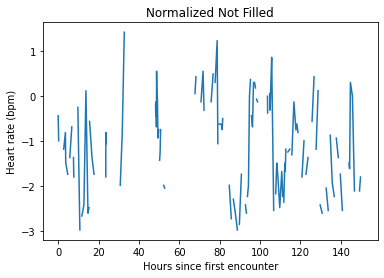

In [30]:
# Before filling gaps
X_train.loc[8, "Heart rate (bpm)"].plot()
plt.title("Normalized Not Filled")
plt.ylabel("Heart rate (bpm)")
plt.xlabel("Hours since first encounter")
plt.show()

In [31]:
fillvars = variables[variables['type'].isin(['Vitals', 'Labs'])].index

X_train[fillvars] = X_train.groupby(level=0)[fillvars].ffill()
X_valid[fillvars] = X_valid.groupby(level=0)[fillvars].ffill()

X_train.fillna(value=0, inplace=True)
X_valid.fillna(value=0, inplace=True)

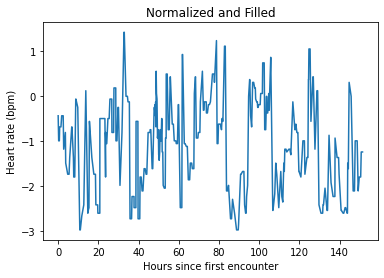

In [32]:
# After filling gaps
X_train.loc[8, "Heart rate (bpm)"].plot()
plt.title("Normalized and Filled")
plt.ylabel("Heart rate (bpm)")
plt.xlabel("Hours since first encounter")
plt.show()

In [34]:
X_train.head(5)

ABG Base excess (mEq/L)  ABG FiO2  ABG HCO3 (mEq/L)  \
encounterID absoluteTime                                                        
8           0.000000                          0.0       0.0               0.0   
            0.250000                          0.0       0.0               0.0   
            0.500000                          0.0       0.0               0.0   
            0.583333                          0.0       0.0               0.0   
            0.750000                          0.0       0.0               0.0   

                          ABG O2 sat (%)  ABG PCO2 (mmHg)  ABG PO2 (mmHg)  \
encounterID absoluteTime                                                    
8           0.000000                 0.0              0.0             0.0   
            0.250000                 0.0              0.0             0.0   
            0.500000                 0.0              0.0             0.0   
            0.583333                 0.0              0.0             0.0   
            0.750000                 0.0              0.0             0.0   

                          ABG TCO2 (mEq/L)  ABG pH  ALT (SGPT) (units/L)  \
encounterID absoluteTime                                                   
8           0.000000                   0.0     0.0                   0.0   
            0.250000                   0.0     0.0                   0.0   
            0.500000                   0.0     0.0                   0.0   
            0.583333                   0.0     0.0                   0.0   
            0.750000                   0.0     0.0                   0.0   

                          AST (SGOT) (units/L)  ...  Vasopressin  Vecuronium  \
encounterID absoluteTime                        ...                            
8           0.000000                       0.0  ...          0.0         0.0   
            0.250000                       0.0  ...          0.0         0.0   
            0.500000                       0.0  ...          0.0         0.0   
            0.583333                       0.0  ...          0.0         0.0   
            0.750000                       0.0  ...          0.0         0.0   

                          Ventilator rate (bpm)  VerbalResponse  Vitamin E  \
encounterID absoluteTime                                                     
8           0.000000                        0.0        0.000000        0.0   
            0.250000                        0.0        0.000000        0.0   
            0.500000                        0.0        0.000000        0.0   
            0.583333                        0.0        0.000000        0.0   
            0.750000                        0.0        2.075606        0.0   

                          Volume Tidal  Voriconazole     Weight  \
encounterID absoluteTime                                          
8           0.000000               0.0           0.0 -10.577633   
            0.250000               0.0           0.0 -10.577633   
            0.500000               0.0           0.0 -10.577633   
            0.583333               0.0           0.0 -10.577633   
            0.750000               0.0           0.0 -10.577633   

                          White blood cell count (K/uL)    deltat  
encounterID absoluteTime                                           
8           0.000000                                0.0  0.250000  
            0.250000                                0.0  0.250000  
            0.500000                                0.0  0.083333  
            0.583333                                0.0  0.166667  
            0.750000                                0.0  0.633333  

[5 rows x 265 columns]

## Pad Variable Length Sequences

In [35]:
from tensorflow.keras.preprocessing import sequence

# max number of sequence length
maxlen = 500

# get a list of unique patient encounter IDs
teId = X_train.index.levels[0]
veId = X_valid.index.levels[0]

X_train = [X_train.loc[patient].values for patient in teId]
y_train = [y_train.loc[patient].values for patient in teId]
X_train = sequence.pad_sequences(X_train, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_train = sequence.pad_sequences(y_train, dtype='float32', maxlen=maxlen, padding='post', truncating='post')

# repeating for the validation data
X_valid = [X_valid.loc[patient].values for patient in veId]
y_valid = [y_valid.loc[patient].values for patient in veId]

X_valid = sequence.pad_sequences(X_valid, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_valid = sequence.pad_sequences(y_valid, dtype='float32', maxlen=maxlen, padding='post', truncating='post')

In [36]:
# shape of the array used by the network
print("X_train shape: %s | y_train shape: %s" % (str(X_train.shape), str(y_train.shape)))
print("X_valid shape: %s | y_valid shape: %s" % (str(X_valid.shape), str(y_valid.shape)))

X_train shape: (5000, 500, 265) | y_train shape: (5000, 500, 1)
X_valid shape: (2690, 500, 265) | y_valid shape: (2690, 500, 1)


ix = 3345


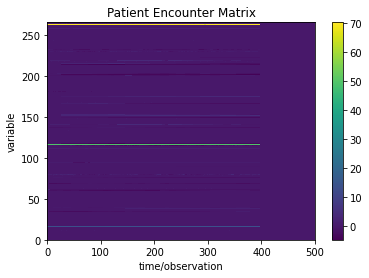

In [37]:
#the full patient encounter as a matrix plot

# figure out how many encounters we have
numencnt = X_train.shape[0]

# choose a random patient encounter to plot
ix = random.randint(0,5000) #Try a few different index values between 0 and 4999
print('ix = {}'.format(ix))

# plot a matrix of observation values
plt.title("Patient Encounter Matrix")
plt.pcolor(np.transpose(X_train[ix,:,:]))
plt.ylabel("variable")
plt.xlabel("time/observation")
plt.ylim(0,265)
plt.colorbar()
plt.show()

# Building model

In [38]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Masking
from tensorflow.keras.optimizers import RMSprop

# inputs
x = Input((None, X_train.shape[-1]) , name='input')
mask = Masking(0, name='input_masked')(x)

# LSTMs
lstm_kwargs = {'dropout': 0.25, 'recurrent_dropout': 0.1, 'return_sequences': True, 'implementation': 2}
lstm1 = LSTM(128, name='lstm1', **lstm_kwargs)(mask)

output = TimeDistributed(Dense(1, activation='sigmoid'), name='output')(lstm1)
model = Model(inputs=x, outputs=output)

optimizer = RMSprop(lr=0.005)
model.compile(optimizer=optimizer, loss='binary_crossentropy')

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, None, 265)]       0         
_________________________________________________________________
input_masked (Masking)       (None, None, 265)         0         
_________________________________________________________________
lstm1 (LSTM)                 (None, None, 128)         201728    
_________________________________________________________________
output (TimeDistributed)     (None, None, 1)           129       
Total params: 201,857
Trainable params: 201,857
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1)

Train on 5000 samples
Epoch 1/15
5000/5000 [==============================] - 49s 10ms/sample - loss: 0.0797
Epoch 2/15
5000/5000 [==============================] - 49s 10ms/sample - loss: 0.0675
Epoch 3/15
5000/5000 [==============================] - 49s 10ms/sample - loss: 0.0607
Epoch 4/15
5000/5000 [==============================] - 49s 10ms/sample - loss: 0.0579
Epoch 5/15
5000/5000 [==============================] - 48s 10ms/sample - loss: 0.0552
Epoch 6/15
5000/5000 [==============================] - 48s 10ms/sample - loss: 0.0517
Epoch 7/15
5000/5000 [==============================] - 49s 10ms/sample - loss: 0.0524
Epoch 8/15
5000/5000 [==============================] - 48s 10ms/sample - loss: 0.0481
Epoch 9/15
5000/5000 [==============================] - 48s 10ms/sample - loss: 0.0448
Epoch 10/15
5000/5000 [==============================] - 49s 10ms/sample - loss: 0.0420
Epoch 11/15
5000/5000 [==============================] - 49s 10ms/sample - loss: 0.0438
Epoch 12/15
5000/50

# Evaluation

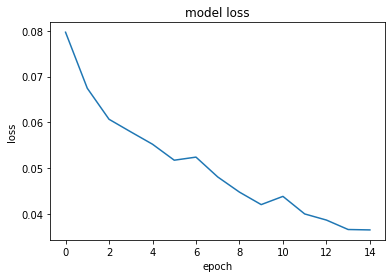

In [47]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [48]:
# Generating model results on the holdout validation set
preds = model.predict(X_valid)

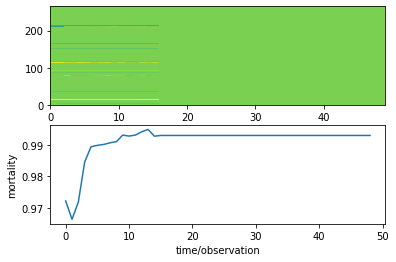

In [51]:
def random_patient_mortality_pred():
    numencnt = X_valid.shape[0]
    ix = random.randint(0,numencnt-1)
    f, (ax1, ax2) = plt.subplots(2, 1)

    # Plot
    ax1.pcolor(np.transpose(X_valid[ix,1:50,:]))
    ax1.set_ylim(0,265)
    plt.ylabel("mortality")
    plt.xlabel("time/observation")
    ax2.plot(preds[ix,1:50])
    
random_patient_mortality_pred()

In [54]:
from sklearn.metrics import roc_curve, auc

label = y_valid[:, 0, :].squeeze();
prediction = preds[:, -1, :].squeeze()

rnn_roc = roc_curve(label,prediction)
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

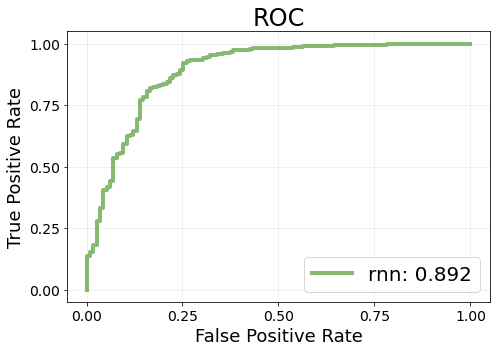

In [58]:
# plot rocs & display AUCs
plt.figure(figsize=(7, 5))
line_kwargs = {'linewidth': 4, 'alpha': 0.8}
plt.plot(rnn_roc[0], rnn_roc[1], label='rnn: %0.3f' % rnn_auc, color='#6AA84F', **line_kwargs)
plt.legend(loc='lower right', fontsize=20)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.title("ROC", fontsize=24)
plt.grid(alpha=0.25)
plt.tight_layout()

In [55]:
# scores for baselines PRISM3 and PIM2 were aggregated and stored in `data/pim2prism3.csv`.
# load the scores and then compute the ROC curves and AUC
index = pd.read_csv(os.path.join('/dli/task/csv', 'pim2prism3.csv'))

# get the mortality reponse for each patient
mortrep = index['mortalityResponse'];

# generate ROC curves for each index
pim2_roc   = roc_curve(mortrep, -index['PIM2'  ])
prism3_roc = roc_curve(mortrep, -index['PRISM3'])

# compute the area under the curve for each index
pim2_auc   = auc(  pim2_roc[0],   pim2_roc[1])
prism3_auc = auc(prism3_roc[0], prism3_roc[1])

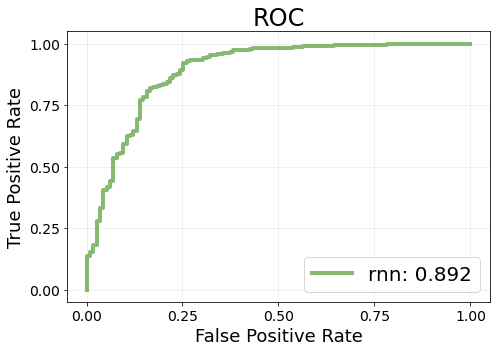

In [57]:
# plot rocs & display AUCs
plt.figure(figsize=(7, 5))
line_kwargs = {'linewidth': 4, 'alpha': 0.8}
plt.plot(rnn_roc[0], rnn_roc[1], label='rnn: %0.3f' % rnn_auc, color='#6AA84F', **line_kwargs)
plt.legend(loc='lower right', fontsize=20)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.title("ROC", fontsize=24)
plt.grid(alpha=0.25)
plt.tight_layout()